<a href="https://colab.research.google.com/github/krmacit/Neural-Networks-Deep-Learning/blob/master/LSTM_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as  tf
from tensorflow.keras import backend as tfbK
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

tf.compat.v1.disable_eager_execution()

tf.random.set_seed(113)
np.random.seed(113)

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

Basic 1 layer LSTM Model for MNIST classification:

In [0]:
model = Sequential(name= 'Basic_LSTM_Model')
model.add(LSTM(64, input_shape= (x_train.shape[1:]), activation='relu', name= 'LSTM_Layer'))
model.add(Dense(10, activation= 'softmax', name= 'Output_Layer'))
model.summary()

feature_extraction = tfbK.function([model.input, tfbK.learning_phase()], [model.get_layer("LSTM_Layer").output])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "Basic_LSTM_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_Layer (LSTM)            (None, 64)                23808     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                650       
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________


In [0]:
adamOptimizer = Adam()

In [0]:
model.compile(optimizer=adamOptimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train,
          epochs=5,
          shuffle= True,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 29s 477us/sample - loss: 0.6828 - accuracy: 0.7794 - val_loss: 0.2083 - val_accuracy: 0.9387
Epoch 2/5
60000/60000 [==============================] - 29s 486us/sample - loss: 0.1671 - accuracy: 0.9498 - val_loss: 0.1160 - val_accuracy: 0.9623
Epoch 3/5
60000/60000 [==============================] - 29s 491us/sample - loss: 0.1133 - accuracy: 0.9650 - val_loss: 0.1167 - val_accuracy: 0.9634
Epoch 4/5
60000/60000 [==============================] - 28s 473us/sample - loss: 0.0903 - accuracy: 0.9723 - val_loss: 0.0779 - val_accuracy: 0.9754
Epoch 5/5
60000/60000 [==============================] - 28s 469us/sample - loss: 0.0737 - accuracy: 0.9774 - val_loss: 0.0648 - val_accuracy: 0.9799


Model result plot example:

Our model classifies this image as a 2


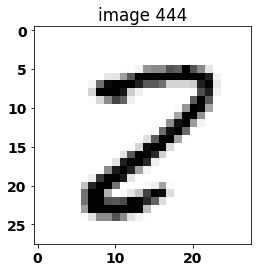

In [0]:
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

image_index = 444

plt.title("image {}".format(image_index))
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28))
print("Our model classifies this image as a {}".format(pred.argmax()))

Model to get embedding (feature vector) for the input image

In [0]:
outputs = [feature_extraction([x_train, int(False)])][0][0]

In [0]:
TSNEModel = TSNE(n_components=2, random_state=0)
x_tnse = outputs
y_tnse = y_train.reshape(len(y_train),1)
tsne = TSNEModel.fit_transform(x_tnse)

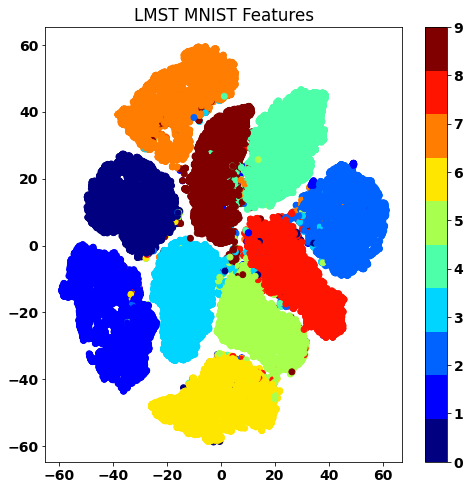

In [0]:
plt.figure(figsize=(8,8))
cmap = plt.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_tnse,s=35,cmap=cmap)
plt.title("LMST MNIST Features")
plt.colorbar()
plt.show()

In [0]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [0]:
kmeans = KMeans(n_clusters=10, random_state=0, init='k-means++').fit(tsne)
centroid = kmeans.cluster_centers_

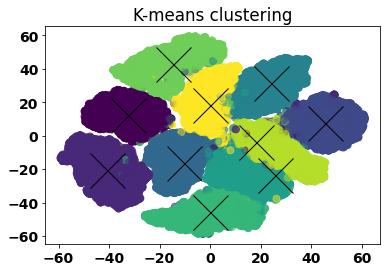

In [0]:
plt.figure(1)
plt.scatter(tsne[:, 0], tsne[:, 1], c=y_tnse, s=50, alpha=0.5)
plt.plot(centroid[:, 0], centroid[:, 1], "kx", markersize=35)
plt.title("K-means clustering")
plt.show()